In [6]:
# import dependencies
import random
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from citipy import citipy
from nturl2path import pathname2url
import pprint as pprint
import requests
from config import ow_key
import time
from datetime import datetime

pp = pprint.PrettyPrinter(indent = 4, width =80, compact = False)

In [2]:
# make 1500 random coordinate pairs
coords = list(zip(np.random.uniform(-90,90,1500),np.random.uniform(-90,90,1500)))

# use citipy to find and make list of the nearest cities to the random coordinates
cities = []
for i in coords:
    city = citipy.nearest_city(i[0],i[1]).city_name
    if city not in cities:
        cities.append(city)

In [3]:
#check to see there are at least 500 unique cities in list
print('There are', len(cities),'cities. No duplicates?',len(cities) == len(set(cities)))

There are 608 cities. No duplicates? True


In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + ow_key

In [5]:
#create empty lis to hold weather data

city_data = []

# print start of log

print('Beginning Data Retrieval        ')
print('--------------------------------')

#make counters
record_count = 1
set_count = 1

#loop through cities in list 
for i, city in enumerate(cities):

    #50 at a time due to free tier limits
    if(i % 50==0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #create endpoint url for each city
    city_url = url + '&q=' + city.replace(' ','+')

    # log the url, record, amd set numbers and the city
    print( f'Processing Record {record_count} of Set {set_count} | {city}')

    # add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | porto novo
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | quelimane
Processing Record 5 of Set 1 | san francisco
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | abha
Processing Record 9 of Set 1 | jacareacanga
Processing Record 10 of Set 1 | uzventis
Processing Record 11 of Set 1 | anar darreh
City not found. Skipping...
Processing Record 12 of Set 1 | lardos
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | murgab
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | arona
Processing Record 18 of Set 1 | makow mazowiecki
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | port a

In [8]:
# convert data to pandas dataframe
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,83.01,83,40,8.05,BB,2022-10-09 21:29:55
1,Porto Novo,6.4965,2.6036,76.82,81,100,2.26,BJ,2022-10-09 21:29:56
2,Ushuaia,-54.8000,-68.3000,44.26,81,40,14.97,AR,2022-10-09 21:29:56
3,Quelimane,-17.8786,36.8883,75.15,88,0,2.30,MZ,2022-10-09 21:29:56
4,San Francisco,37.7749,-122.4194,84.02,82,20,19.57,US,2022-10-09 21:25:59


In [10]:
# reorder columns
df = df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bathsheba,BB,2022-10-09 21:29:55,13.2167,-59.5167,83.01,83,40,8.05
1,Porto Novo,BJ,2022-10-09 21:29:56,6.4965,2.6036,76.82,81,100,2.26
2,Ushuaia,AR,2022-10-09 21:29:56,-54.8000,-68.3000,44.26,81,40,14.97
3,Quelimane,MZ,2022-10-09 21:29:56,-17.8786,36.8883,75.15,88,0,2.30
4,San Francisco,US,2022-10-09 21:25:59,37.7749,-122.4194,84.02,82,20,19.57


In [12]:
# create output csv
file = '../UNCBC-HW6-PlanMyTripApp/weather_data/cities.csv'
df.to_csv(file,index_label = 'City_ID')

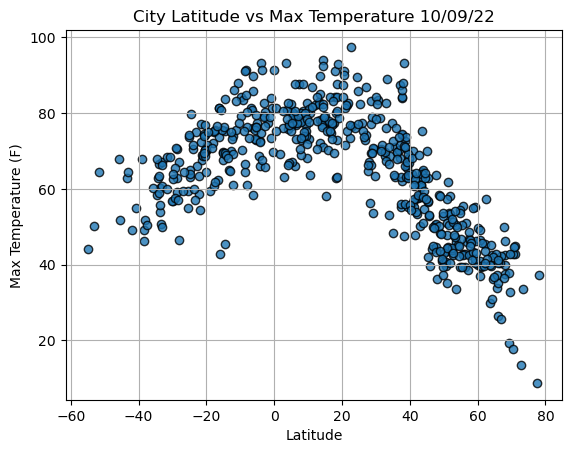

In [22]:
# get date 
today = time.strftime('%x')

#build scatter plot, Lat v Max Temp
plt.scatter(df['Lat'],
            df['Max Temp'],
            edgecolor='k',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)


#save plot
plt.savefig('../UNCBC-HW6-PlanMyTripApp/weather_data/Fig1.png')

#show plot
plt.show()

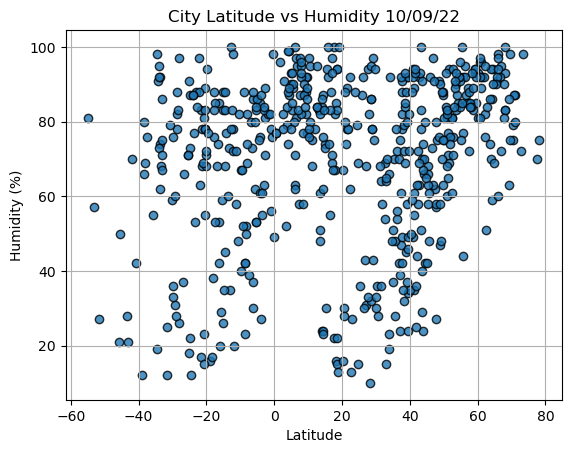

In [23]:
#build scatter plot, Lat v Humidity
plt.scatter(df['Lat'],
            df['Humidity'],
            edgecolor='k',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

plt.title(f'City Latitude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


#save plot
plt.savefig('../UNCBC-HW6-PlanMyTripApp/weather_data/Fig2.png')

#show plot
plt.show()

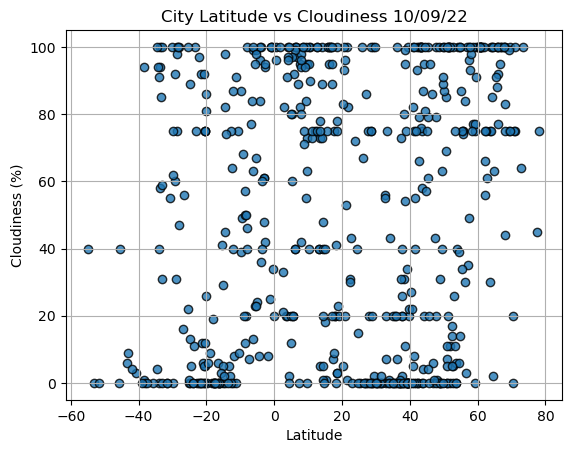

In [24]:
#build scatter plot, Lat v Cloudiness
plt.scatter(df['Lat'],
            df['Cloudiness'],
            edgecolor='k',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

plt.title(f'City Latitude vs Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


#save plot
plt.savefig('../UNCBC-HW6-PlanMyTripApp/weather_data/Fig3.png')

#show plot
plt.show()

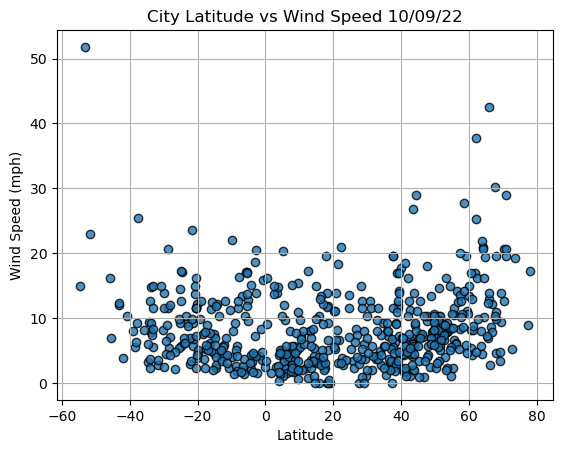

In [25]:
#build scatter plot, Lat v Wind Speed
plt.scatter(df['Lat'],
            df['Wind Speed'],
            edgecolor='k',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


#save plot
plt.savefig('../UNCBC-HW6-PlanMyTripApp/weather_data/Fig4.png')

#show plot
plt.show()